# Training Several Models

In this notebook, we have trained 5 different models and printed their ROC Curves at the end. 

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from scipy.sparse.construct import rand 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

Importing test and train data 


In [2]:
# X_bal = pd.read_csv('../data/experiment3/xtrain.csv', sep=',')
# y_bal = pd.read_csv('../data/experiment3/ytrain.csv', sep=',')

X_bal = pd.read_csv('xtrain.csv', sep=',')
y_bal = pd.read_csv('ytrain.csv', sep=',')

X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.33, random_state=42)

In [3]:
np.unique(y_bal,return_counts=True)

(array([0., 1.]), array([17363, 17364]))

## 1.1 logistic regression model

In [4]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

LR= LogisticRegression(max_iter=1600, random_state=42)
LR.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1600,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Classification report and Confusion Matrix for LR


Train: accuracy of LR:  0.68
Train: f1_score of LR:  0.7
Train: precision of LR:  0.67
Train: recall of LR:  0.73

Test: accuracy of LR:  0.69
Test: f1_score of LR:  0.71
Test: precision of LR:  0.68
Test: recall of LR:  0.74

Logistic Regression: Confusion Matrix on Test


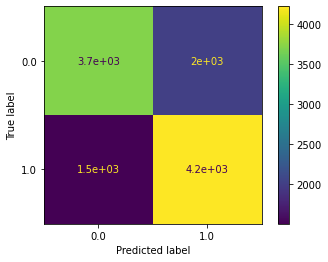

In [5]:
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix
from matplotlib import pyplot as plt
y_pred = LR.predict(X_test)

print('\nTrain: accuracy of LR: ', round(accuracy_score(y_train, LR.predict(X_train)), 2))
print('Train: f1_score of LR: ', round(f1_score(y_train, LR.predict(X_train)), 2))
print('Train: precision of LR: ', round(precision_score(y_train, LR.predict(X_train)), 2))
print('Train: recall of LR: ', round(recall_score(y_train, LR.predict(X_train)), 2))

print('\nTest: accuracy of LR: ', round(accuracy_score(y_test, y_pred), 2))
print('Test: f1_score of LR: ', round(f1_score(y_test, y_pred), 2))
print('Test: precision of LR: ', round(precision_score(y_test, y_pred), 2))
print('Test: recall of LR: ', round(recall_score(y_test, y_pred), 2))

print("\nLogistic Regression: Confusion Matrix on Test")
plot_confusion_matrix(LR, X_test,  y_test);

## 1.2 Decision Tree

In [6]:
from sklearn.tree import DecisionTreeClassifier
prev_score = 0
decision = DecisionTreeClassifier(criterion='entropy',max_depth=4,random_state=42)
decision.fit(X_train,y_train)
y_pred = decision.predict(X_test)

print('\nTrain: accuracy: ', round(accuracy_score(y_train, decision.predict(X_train)), 2))
print('Train: f1_score: ', round(f1_score(y_train, decision.predict(X_train)), 2))
print('Train: precision: ', round(precision_score(y_train, decision.predict(X_train)), 2))
print('Train: recall: ', round(recall_score(y_train, decision.predict(X_train)), 2))

print('\nTest: accuracy: ', round(accuracy_score(y_test, y_pred), 2))
print('Test: f1_score: ', round(f1_score(y_test, y_pred), 2))
print('Test: precision: ', round(precision_score(y_test, y_pred), 2))
print('Test: recall: ', round(recall_score(y_test, y_pred), 2))


Train: accuracy:  0.73
Train: f1_score:  0.72
Train: precision:  0.73
Train: recall:  0.71

Test: accuracy:  0.73
Test: f1_score:  0.73
Test: precision:  0.74
Test: recall:  0.72


## 1.3 SVM Model

In [7]:
from sklearn.svm import SVC
#svc_classifier = SVC(class_weight={1:10})
svc_classifier= SVC(random_state=42)

svc_classifier.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=42, shrinking=True, tol=0.001,
    verbose=False)

Classification report and Confusion Matrix for SVM 


Train: accuracy of SVM:  0.99
Train: f1_score of SVM:  0.99
Train: precision of SVM:  0.97
Train: recall of SVM:  1.0

Test: accuracy of SVM:  0.98
Test: f1_score of SVM:  0.98
Test: precision of SVM:  0.97
Test: recall of SVM:  1.0

SVM: Confusion Matrix on Test


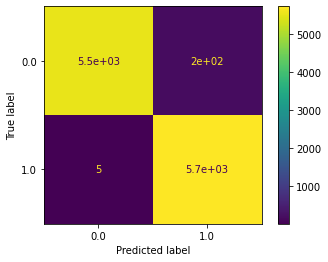

In [8]:
y_pred_svc = svc_classifier.predict(X_test)    

print('\nTrain: accuracy of SVM: ', round(accuracy_score(y_train, svc_classifier.predict(X_train)), 2))
print('Train: f1_score of SVM: ', round(f1_score(y_train,svc_classifier.predict(X_train)), 2))
print('Train: precision of SVM: ', round(precision_score(y_train, svc_classifier.predict(X_train)), 2))
print('Train: recall of SVM: ', round(recall_score(y_train, svc_classifier.predict(X_train)), 2))


print('\nTest: accuracy of SVM: ', round(accuracy_score(y_test, y_pred_svc), 2))
print('Test: f1_score of SVM: ', round(f1_score(y_test, y_pred_svc), 2))
print('Test: precision of SVM: ', round(precision_score(y_test, y_pred_svc), 2))
print('Test: recall of SVM: ', round(recall_score(y_test, y_pred_svc), 2))

print("\nSVM: Confusion Matrix on Test")
plot_confusion_matrix(svc_classifier, X_test,  y_test);


# 1.4 Randomforest 

In [9]:
from sklearn.ensemble import RandomForestClassifier

random_classifier=RandomForestClassifier(criterion='gini',max_depth=4,random_state=42)
random_classifier.fit(X_train,y_train)

y_pred = random_classifier.predict(X_test)

print('\nTrain: accuracy: ', round(accuracy_score(y_train, random_classifier.predict(X_train)), 2))
print('Train: f1_score: ', round(f1_score(y_train, random_classifier.predict(X_train)), 2))
print('Train: precision: ', round(precision_score(y_train, random_classifier.predict(X_train)), 2))
print('Train: recall: ', round(recall_score(y_train, random_classifier.predict(X_train)), 2))

print('\nTest: accuracy: ', round(accuracy_score(y_test, y_pred), 2))
print('Test: f1_score: ', round(f1_score(y_test, y_pred), 2))
print('Test: precision: ', round(precision_score(y_test, y_pred), 2))
print('Test: recall: ', round(recall_score(y_test, y_pred), 2))


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.



Train: accuracy:  0.86
Train: f1_score:  0.86
Train: precision:  0.81
Train: recall:  0.92

Test: accuracy:  0.86
Test: f1_score:  0.87
Test: precision:  0.82
Test: recall:  0.92


Classification report and Confusion Matrix for Random Forest


Random Forest: Confusion Matrix on Test


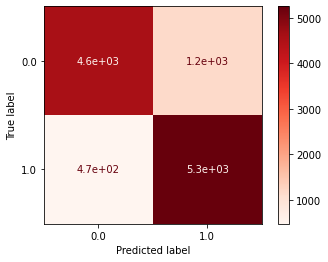

In [10]:
print("\nRandom Forest: Confusion Matrix on Test")
plot_confusion_matrix(random_classifier, X_test,  y_test,  cmap=plt.cm.Reds);


## 1.5 Neural Model

In [11]:
from sklearn.neural_network import MLPClassifier


for i in range(2,4):

    
    neural_classifier = MLPClassifier(hidden_layer_sizes=[50]*i ,random_state=42)
    neural_classifier.fit(X_train,y_train)
    
    y_pred = neural_classifier.predict(X_test)
    
    print(f'\n*****Neural Network, hiddenlayers=  {i}*******')
    print('Train: accuracy: ', round(accuracy_score(y_train, neural_classifier.predict(X_train)), 2))
    print('Train: f1_score: ', round(f1_score(y_train, neural_classifier.predict(X_train)), 2))
    print('Train: precision: ', round(precision_score(y_train, neural_classifier.predict(X_train)), 2))
    print('Train: recall: ', round(recall_score(y_train, neural_classifier.predict(X_train)), 2))
        
    print('\nTest: accuracy: ', round(accuracy_score(y_test, y_pred), 2))
    print('Test: f1_score: ', round(f1_score(y_test, y_pred), 2))
    print('Test: precision: ', round(precision_score(y_test, y_pred), 2))
    print('Test: recall: ', round(recall_score(y_test, y_pred), 2))

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



*****Neural Network, hiddenlayers=  2*******
Train: accuracy:  1.0
Train: f1_score:  1.0
Train: precision:  1.0
Train: recall:  1.0

Test: accuracy:  0.99
Test: f1_score:  0.99
Test: precision:  0.98
Test: recall:  1.0


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:934: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



*****Neural Network, hiddenlayers=  3*******
Train: accuracy:  1.0
Train: f1_score:  1.0
Train: precision:  1.0
Train: recall:  1.0

Test: accuracy:  0.99
Test: f1_score:  0.99
Test: precision:  0.97
Test: recall:  1.0


Classification report and Confusion Matrix for Neural


Train: accuracy of Neural:  1.0
Train: f1_score:  1.0
Train: precision:  1.0
Train: recall:  1.0

Test: accuracy of Neural:  0.9863874345549738
Test: f1_score:  0.99
Test: precision:  0.97
Test: recall:  1.0

Neural Model: Confusion Matrix on Test


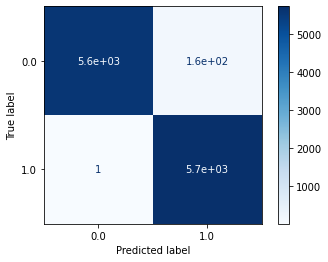

In [12]:
y_pred_neural = neural_classifier.predict(X_test)    

print('\nTrain: accuracy of Neural: ', round(accuracy_score(y_train,   neural_classifier.predict(X_train)), 2))
print('Train: f1_score: ', round(f1_score(y_train, neural_classifier.predict(X_train)), 2))
print('Train: precision: ', round(precision_score(y_train, neural_classifier.predict(X_train)), 2))
print('Train: recall: ', round(recall_score(y_train, neural_classifier.predict(X_train)), 2))

print('\nTest: accuracy of Neural: ', accuracy_score(y_test,   y_pred_neural))
print('Test: f1_score: ', round(f1_score(y_test, y_pred_neural), 2))
print('Test: precision: ', round(precision_score(y_test, y_pred_neural), 2))
print('Test: recall: ', round(recall_score(y_test, y_pred_neural), 2))

print("\nNeural Model: Confusion Matrix on Test")
plot_confusion_matrix(neural_classifier, X_test,  y_test, cmap=plt.cm.Blues); 

plot the ROC Curves of all models - 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


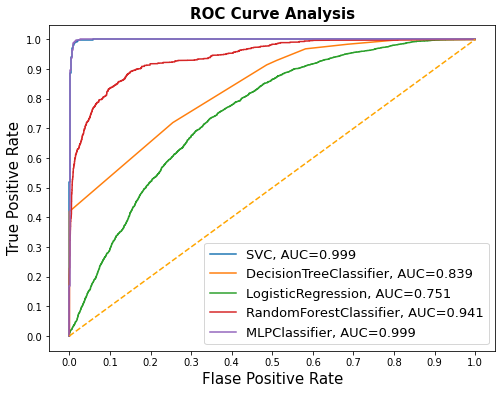

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

svc_classifier_forroc= SVC(random_state=42, probability=True)

svc_classifier_forroc.fit(X_train,y_train)


classifiers = [svc_classifier_forroc,decision,LR, random_classifier, neural_classifier]

# Train the models and record the results
for model in classifiers:
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test,  yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':model.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)


fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("Flase Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()